In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from PIL import Image
import random
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import pickle
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import math
import time

### Resnet50를 이용한 이미지 임베딩 벡터 추출


In [3]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

94765736/94765736 [==============================] - 0s 0us/step


In [4]:
def extract_features(img_path, model):

    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)

    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    normalized_features = features / norm(features)

    return normalized_features

In [5]:
features = extract_features('/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/대학로 1위 연극 〈쉬어매드니스〉.png', model)[0]
print(len(features))

1/1 [==============================] - 12s 12s/step
2048


In [6]:
features

array([0.02710579, 0.        , 0.00337354, ..., 0.        , 0.02262815,
       0.00790404], dtype=float32)

In [7]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.gif']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [8]:
root_dir = '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터'
filenames = sorted(get_file_list(root_dir))

In [9]:
filenames

['/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/(리얼타임 코믹연극) 택시안에서 - 서울.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/(코믹연극) 달동네-부산.gif',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/10년 연속 1위 연극〈옥탑방고양이〉- 틴틴홀.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/2023 연극 〈친정엄마와 2박 3일〉 - 고양.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/2시간탈출 졸탄쇼.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/3대가 웃고 우는 연극 〈염쟁이 유씨〉.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/4D공포연극 〈스위치〉.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/공포스릴러연극〈두여자〉- 대구.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/공포연극 조각.png',
 '/content/drive/MyDrive/캡스톤/데이터/연극/연극_포스터/공포연극 ［자

In [10]:
len(filenames)

64

In [ ]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model)[0])

##### 유클리드 거리 / 코사인 유사도를 기반으로 쿼리 이미지를 나타내는 특징과 가장 가까운 이미지들을 찾음

In [12]:
neighbors = NearestNeighbors(n_neighbors=10, metric='euclidean').fit(feature_list)   # 유클리드 거리
neighbors_1 = NearestNeighbors(n_neighbors=10, metric='cosine').fit(feature_list)    # 코사인 유사도

In [13]:
def plot_images(image_paths, distances):
    plt.figure(figsize=(15, 7))
    columns = len(image_paths)

    for i, path in enumerate(image_paths):
        plt.subplot(1, columns, i + 1)

        # Use PIL to open and display the image
        img = Image.open(path)
        plt.imshow(img)

        plt.title(f"Dist: {distances[i]:.4f}")
        plt.axis('off')

    plt.show()

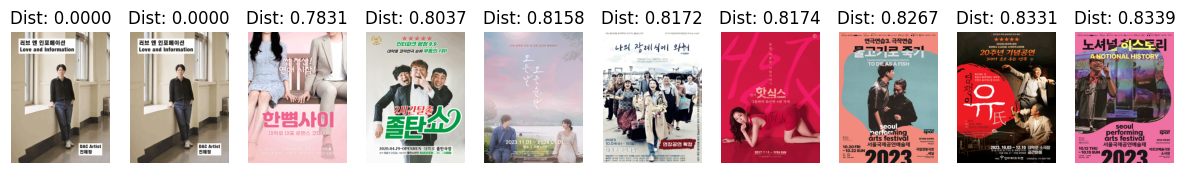

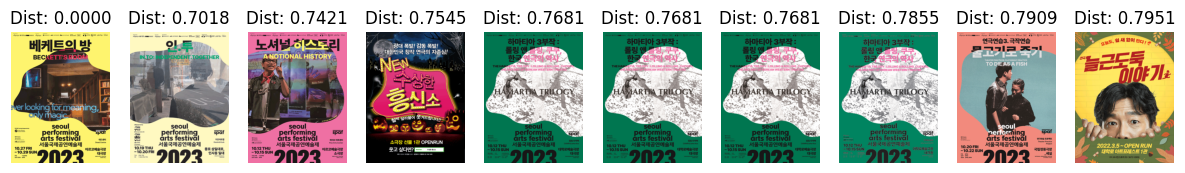

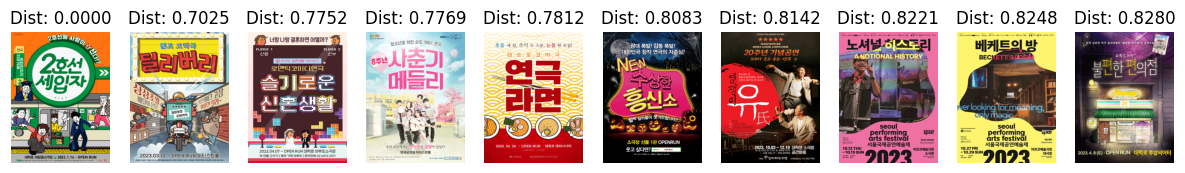

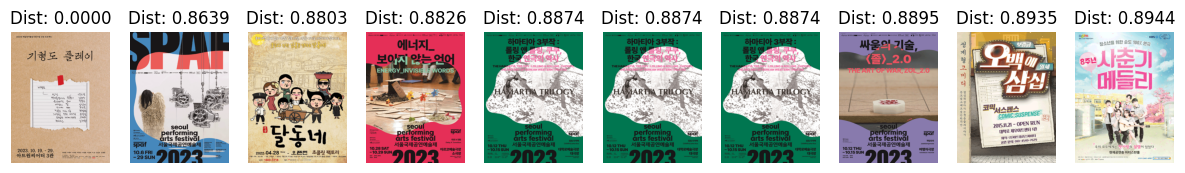

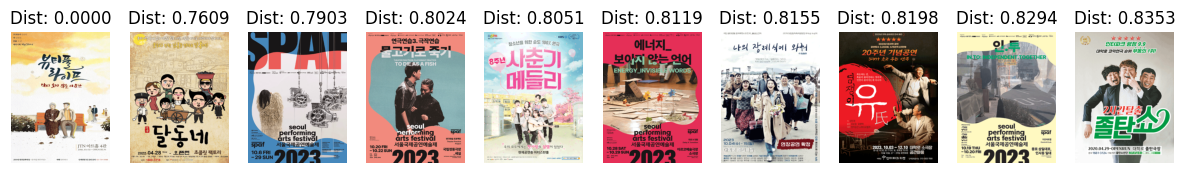

In [22]:
# 유클리드 거리 기반 - 랜덤으로 5개의 이미지만 유사도가 높은 10개의 이미지를 출력

random_filenames = random.sample(filenames, 5)

for filename in random_filenames:
    current_image_index = filenames.index(filename)
    distances, indices = neighbors.kneighbors([feature_list[current_image_index]])
    similar_image_paths = [filenames[current_image_index]] + [filenames[indices[0][j]] for j in range(1, 10)]
    plot_images(similar_image_paths, distances[0])